In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data loading from local file

In [2]:
df=pd.read_csv('D:\\Driuve D\\data\\uber-raw-data-apr14.csv')

In [3]:
df

,Date/Time,Lat,Lon,Base
0,04-01-2014 00:11,40.7690,-73.9549,B02512
1,04-01-2014 00:17,40.7267,-74.0345,B02512
2,04-01-2014 00:21,40.7316,-73.9873,B02512
3,04-01-2014 00:28,40.7588,-73.9776,B02512
4,04-01-2014 00:33,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [4]:
df.head()

,Date/Time,Lat,Lon,Base
0,04-01-2014 00:11,40.7690,-73.9549,B02512
1,04-01-2014 00:17,40.7267,-74.0345,B02512
2,04-01-2014 00:21,40.7316,-73.9873,B02512
3,04-01-2014 00:28,40.7588,-73.9776,B02512
4,04-01-2014 00:33,40.7594,-73.9722,B02512


In [5]:
df.shape

(564516, 4)

In [6]:
df.describe()

,Lat,Lon
count,564516.000000,564516.000000
mean,40.740005,-73.976817
std,0.036083,0.050426
min,40.072900,-74.773300
25%,40.722500,-73.997700
50%,40.742500,-73.984800
75%,40.760700,-73.970000
max,42.116600,-72.066600


In [7]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [20]:
df.duplicated().sum()

7749

Most values in the Latitude and Longitude will be same so we shall not remove duplicated data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [9]:
df.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [10]:
df.rename({'Date/Time':'Date'},axis=1,inplace=True)

In [21]:
df.head()

,Date,Lat,Lon,Base,Date_col,Time_col
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,00:11:00
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,00:17:00
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,00:21:00
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,00:28:00
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,00:33:00


In [12]:
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df['Date_col'] = df['Date'].dt.date
df['Time_col']=df['Date'].dt.time

In [14]:
list(df)

['Date', 'Lat', 'Lon', 'Base', 'Date_col', 'Time_col']

# Data cleaning

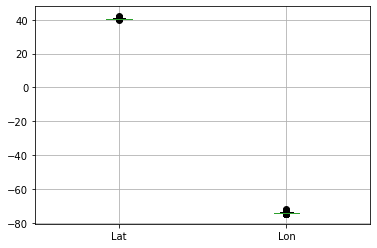

In [22]:
df.boxplot()
plt.show()

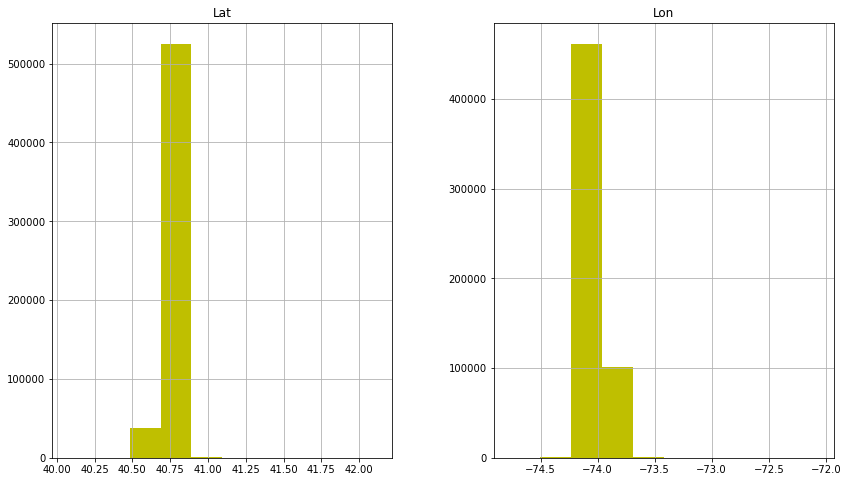

In [23]:
df.hist(['Lat','Lon'],figsize=(14,8),color='y')
plt.show()

Parsing hour, weekday and day from the Date column 

In [25]:
def get_weekday(dt):
    return dt.weekday()

df['weekday']=df['Date'].transform(get_weekday)

In [26]:
def get_dom(dt):
    return dt.day

df['dom']=df['Date'].transform(get_dom)

In [27]:
def get_hour(dt):
    return dt.hour

df['hour']=df['Date'].map(get_hour)

In [30]:
df.sample(8)

,Date,Lat,Lon,Base,Date_col,Time_col,weekday,dom,hour
185779,2014-04-27 00:31:00,40.7257,-73.9921,B02598,2014-04-27,00:31:00,6,27,0
234176,2014-04-04 20:11:00,40.7817,-73.9551,B02617,2014-04-04,20:11:00,4,4,20
271443,2014-04-15 18:34:00,40.7321,-73.9945,B02617,2014-04-15,18:34:00,1,15,18
207704,2014-04-30 09:38:00,40.6962,-73.9904,B02598,2014-04-30,09:38:00,2,30,9
268619,2014-04-14 21:50:00,40.7515,-73.9710,B02617,2014-04-14,21:50:00,0,14,21
360739,2014-04-04 22:51:00,40.7246,-74.0021,B02682,2014-04-04,22:51:00,4,4,22
158738,2014-04-24 05:23:00,40.7334,-73.9973,B02598,2014-04-24,05:23:00,3,24,5
373813,2014-04-06 15:43:00,40.6449,-73.7823,B02682,2014-04-06,15:43:00,6,6,15


In [31]:
df.describe()

,Lat,Lon,weekday,dom,hour
count,564516.000000,564516.000000,564516.00000,564516.000000,564516.000000
mean,40.740005,-73.976817,2.86698,16.117127,14.465043
std,0.036083,0.050426,1.82081,9.048139,5.873925
min,40.072900,-74.773300,0.00000,1.000000,0.000000
25%,40.722500,-73.997700,1.00000,8.000000,10.000000
50%,40.742500,-73.984800,3.00000,16.000000,16.000000
75%,40.760700,-73.970000,4.00000,24.000000,19.000000
max,42.116600,-72.066600,6.00000,30.000000,23.000000


# Data analyzing

In [34]:
y=df.groupby('dom')['Lat']

In [35]:
y.first()

dom
1     40.7690
2     40.7458
3     40.7422
4     40.7528
5     40.7690
6     40.6547
7     40.7205
8     40.6459
9     40.7161
10    40.8065
11    40.7292
12    40.7480
13    40.7075
14    40.7456
15    40.6843
16    40.7592
17    40.7196
18    40.8057
19    40.7211
20    40.7409
21    40.7673
22    40.7641
23    40.7499
24    40.7445
25    40.7239
26    40.7393
27    40.7357
28    40.6449
29    40.6448
30    40.7685
Name: Lat, dtype: float64

In [36]:
for k,rows in df.groupby('dom'):
    print(k,len(rows))

1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


In [37]:
def count_rows(rows):
    return len(rows)

In [38]:
dk=df.groupby('dom').apply(count_rows)

In [39]:
dk

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

# Data visualizing

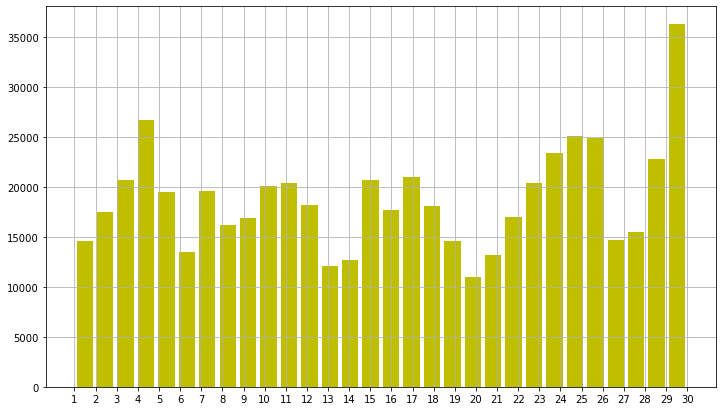

In [43]:
df['dom'].hist(bins=30,figsize=(12,7),color='y',rwidth=0.8)
plt.xticks(range(1,31))
plt.show()

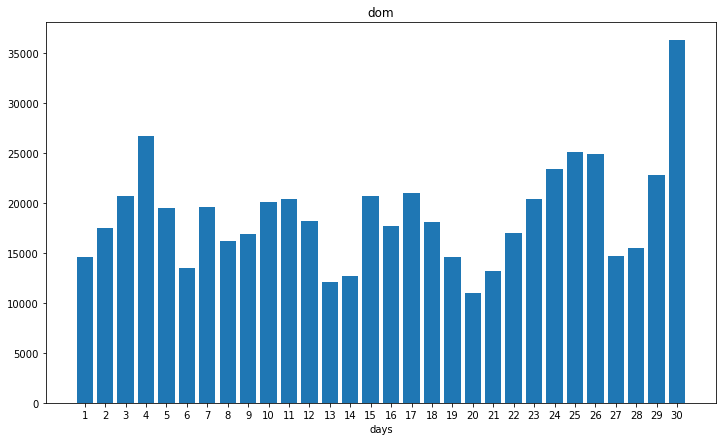

In [44]:
plt.figure(figsize=(12,7))
plt.bar(range(1,31),dk)
plt.xticks(range(1,31))
plt.xlabel('days')
plt.title('dom')
plt.show()

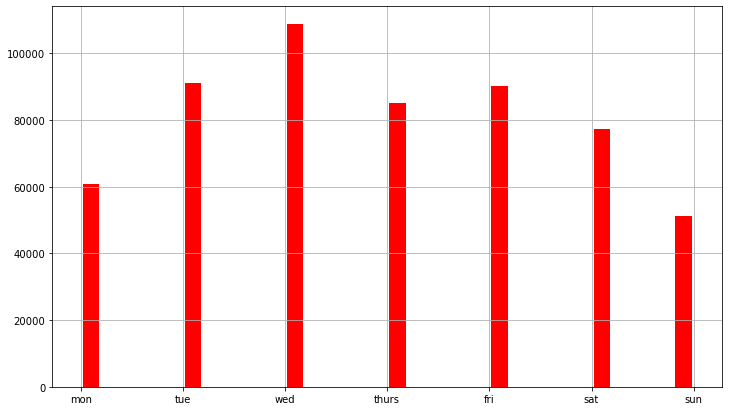

In [45]:
df['weekday'].hist(bins=30,figsize=(12,7),color='r',rwidth=0.8)
plt.xticks(range(0,7),'mon,tue,wed,thurs,fri,sat,sun'.split(','))
plt.show()

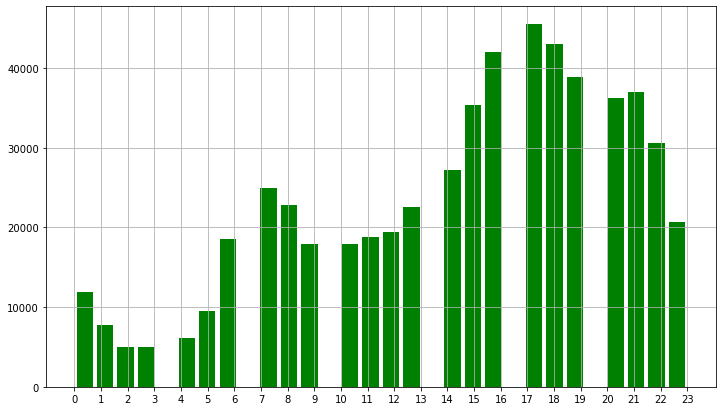

In [46]:
df['hour'].hist(bins=30,figsize=(12,7),color='g',rwidth=0.8)
plt.xticks(range(0,24))
plt.show()

In [55]:
dm=df.groupby(['weekday','hour']).apply(count_rows).unstack()

In [56]:
dm

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


In [57]:
da=df.groupby('dom hour'.split( )).apply(count_rows).unstack()

In [58]:
da

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dom,,,,,,,,,,,,,,,,,,,,,
1,138,66,53,93,166,333,722,1001,780,532,...,736,967,1152,1262,1122,1018,597,878,529,317
2,161,82,59,80,196,344,785,1099,927,656,...,868,1138,1313,1600,1252,1086,1143,994,638,348
3,194,106,66,130,193,354,750,1022,864,591,...,934,1247,1438,1640,1628,1374,1591,1714,1580,793
4,329,184,117,154,238,381,839,1202,1065,769,...,1190,1504,1865,2280,2449,2133,1489,1929,1859,1339
5,723,416,215,181,153,177,206,279,340,450,...,704,1078,1313,1445,1575,1440,1348,1572,1830,1700
6,1485,940,501,315,201,177,174,226,313,441,...,698,847,806,799,767,641,516,571,390,256
7,102,63,57,154,271,388,842,1057,836,585,...,861,1061,1756,2191,2137,2035,1176,1059,646,238
8,187,72,63,119,184,427,889,1159,1069,611,...,716,996,1206,1386,1062,929,1127,944,587,298
9,154,106,76,139,194,353,821,1050,858,565,...,849,1120,1276,1492,1218,1152,995,988,717,362


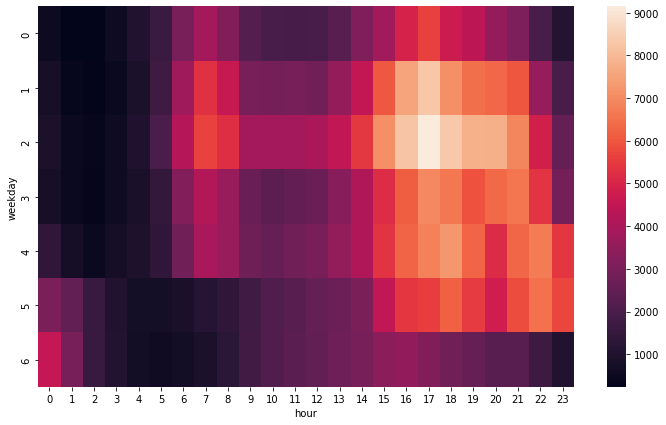

In [59]:
plt.figure(figsize=(12,7))
sns.heatmap(dm)
plt.show()

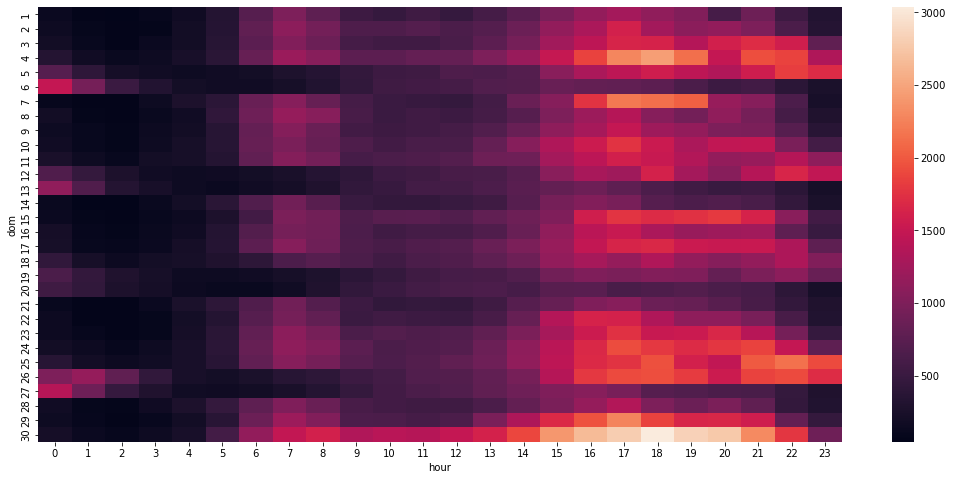

In [61]:
plt.figure(figsize=(18,8))
sns.heatmap(da)
plt.show()

In [135]:
df.columns

Index(['date', 'Lat', 'Lon', 'Base', 'weekday', 'dom', 'hour'], dtype='object')

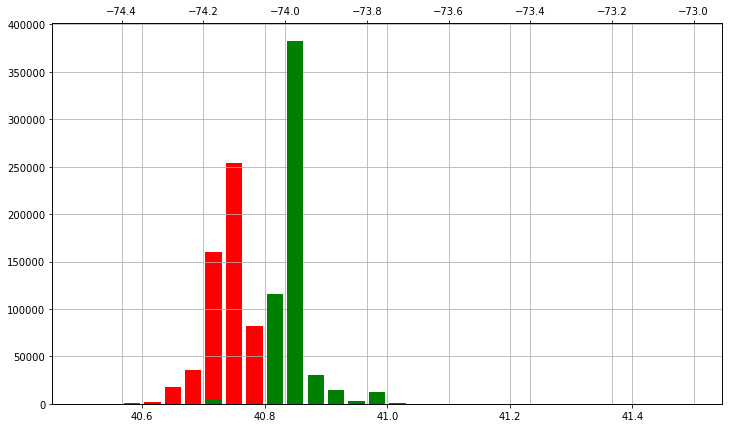

In [62]:
plt.figure(figsize=(12,7))
df['Lat'].hist(bins=30,rwidth=0.8,range=(40.50,41.50),color='r')
plt.twiny()
df['Lon'].hist(bins=30,rwidth=0.8,range=(-74.5,-73.0),color='g')
plt.show()

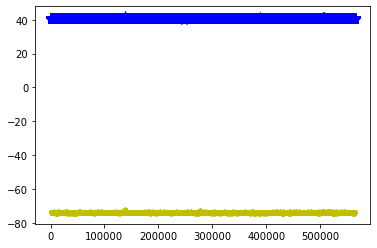

In [63]:
plt.plot(df['Lat'],'*',ms=10,color='b')
plt.plot(df['Lon'],'*',ms=5,color='y')
plt.show()

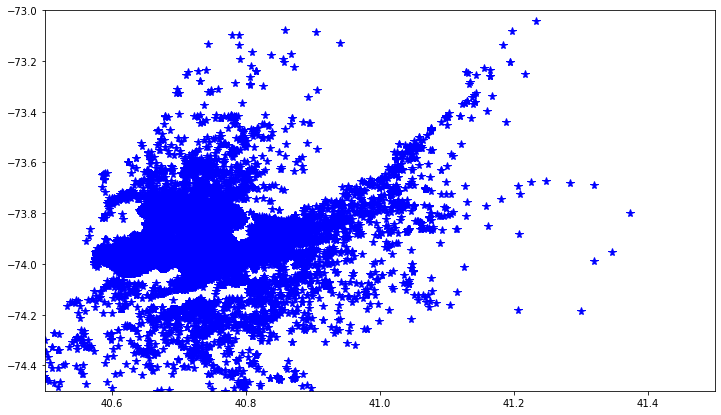

In [64]:
plt.figure(figsize=(12,7))
plt.plot(df['Lat'],df['Lon'],'*',ms=8,color='b')
plt.xlim(40.50,41.50)
plt.ylim(-74.5,-73.0)
plt.show()

In [167]:
import os

In [168]:
os.listdir()

['.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '3D Objects',
 'anaconda3',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'Favorites',
 'ggg.ipynb',
 'GooogleAppRatings-checkpoint.ipynb',
 'GooogleAppRatings.ipynb',
 'Links',
 'Local Settings',
 'MicrosoftEdgeBackups',
 'Music',
 'My Documents',
 'NetHood',
 'new',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{fd9a35db-49fe-11e9-aa2c-248a07783950}.TM.blf',
 'NTUSER.DAT{fd9a35db-49fe-11e9-aa2c-248a07783950}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{fd9a35db-49fe-11e9-aa2c-248a07783950}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Pictures',
 'PrintHood',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'Start Menu',
 'tableau',
 'Templates',
 'titanic_disaster_dataset-checkpoint.ipynb',
 'titanic_disaster_dataset.ipynb',
 'Tracing',
 'uber',
 'uber-raw-data-apr14.csv.csv',
 'uberanal